# Training the Board Game AI

This notebook is used to train the AI for the board game using both Q-Learning and Deep Q-Network (DQN) with PyTorch. It enables GPU acceleration on Windows and maintains compatibility with Mac. The notebook includes visualizations for better transparency and progress tracking across multiple training sessions.

In [1]:
import os
import sys

# Add the project root directory to the Python path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

import numpy as np
import torch
import matplotlib.pyplot as plt
from src.environments.board_game_env import BoardGameEnv
from src.agents.q_learning_agent import QLearningAgent
from src.agents.dqn_agent import DQNAgent
from src.utils.utils import evaluate_agent, plot_training_results, plot_version_comparison
from src.utils.training_utils import train_agent

# Set up device (CPU or CUDA)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set random seed for reproducibility
np.random.seed(42)
torch.manual_seed(42)

Using device: cuda


## Initialize the environment and agents

In [2]:
# Create the game environment
env = BoardGameEnv()
state_size = env.observation_space.shape[0] * env.observation_space.shape[1]
action_size = env.action_space.n

# Create Q-Learning and DQN agents
q_agent = QLearningAgent(state_size, action_size)
dqn_agent = DQNAgent(state_size, action_size, device)

# Set training parameters
num_episodes = 10000
max_steps = 100
batch_size = 32
update_target_every = 100

## Train the agents

Run the training process for both Q-Learning and DQN agents and visualize the results.

Training Q-Learning Agent...


100%|██████████| 10000/10000 [00:57<00:00, 172.43it/s]


Training DQN Agent...


100%|██████████| 10000/10000 [12:40<00:00, 13.15it/s]


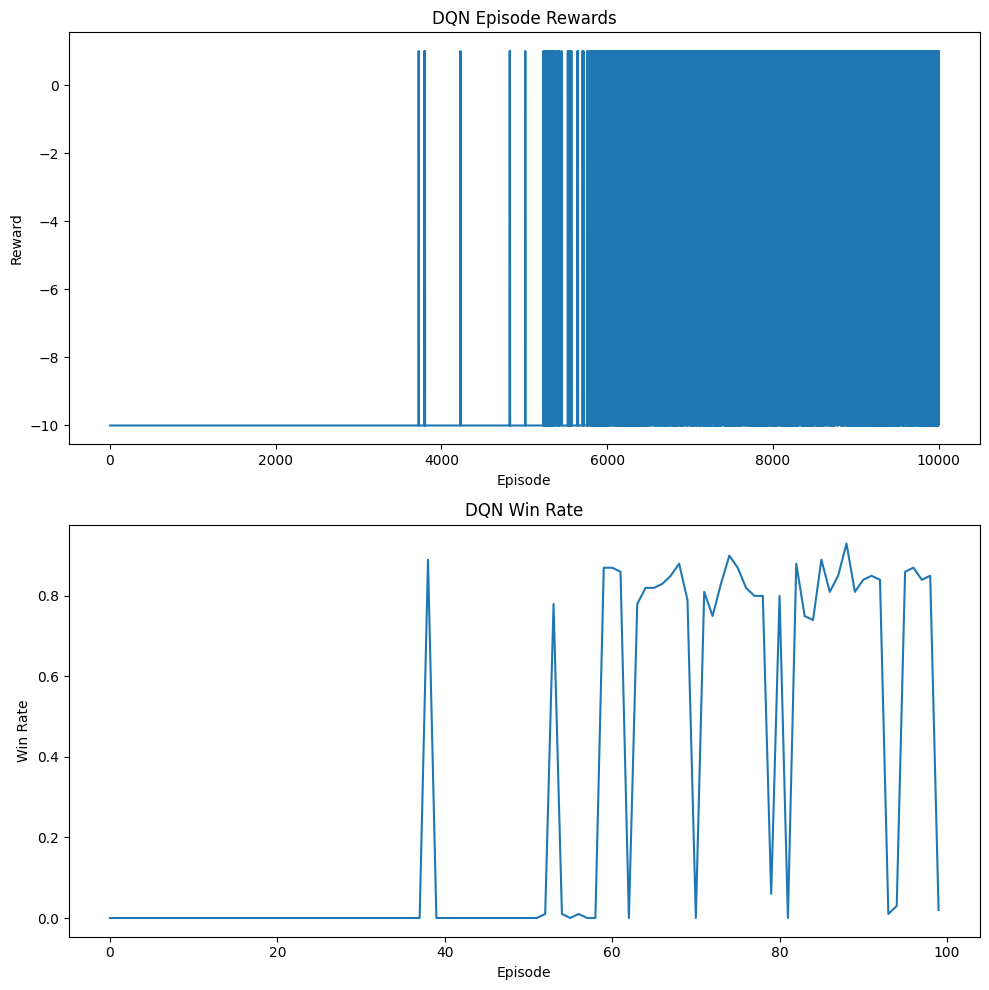

In [3]:
# Train Q-Learning agent
print("Training Q-Learning Agent...")
q_rewards, q_win_rates = train_agent(env, q_agent, num_episodes, max_steps)

# Plot Q-Learning training results
# plot_training_results(q_rewards, q_win_rates, "Q-Learning")

# Train DQN agent
print("Training DQN Agent...")
dqn_rewards, dqn_win_rates = train_agent(env, dqn_agent, num_episodes, max_steps, batch_size, update_target_every)

# Plot DQN training results
plot_training_results(dqn_rewards, dqn_win_rates, "DQN")

## Save the trained models

In [4]:
#q_agent.save_model('models/q_learning_model.json')
dqn_agent.save('models/dqn_model.pth')
print("Models saved successfully.")

FileNotFoundError: [Errno 2] No such file or directory: 'models/q_learning_model.json'

## Compare agent performances

In [ ]:
def compare_agents(env, q_agent, dqn_agent, num_games=100):
    q_win_rate = evaluate_agent(env, q_agent, num_games)
    dqn_win_rate = evaluate_agent(env, dqn_agent, num_games)
    
    print(f"Q-Learning Agent Win Rate: {q_win_rate:.2%}")
    print(f"DQN Agent Win Rate: {dqn_win_rate:.2%}")
    
    plt.bar(['Q-Learning', 'DQN'], [q_win_rate, dqn_win_rate])
    plt.title('Agent Performance Comparison')
    plt.ylabel('Win Rate')
    plt.show()

compare_agents(env, q_agent, dqn_agent)

## Play test games

In [ ]:
def play_test_game(env, agent, agent_name):
    """Play a test game using the trained agent.

    Args:
        env (BoardGameEnv): The game environment.
        agent (QLearningAgent or DQNAgent): The trained agent.
        agent_name (str): The name of the agent (for display purposes).
    """
    state = env.reset()
    done = False
    total_reward = 0

    print(f"\nPlaying a test game with {agent_name} agent:")
    while not done:
        env.render()
        action = agent.act(state)
        state, reward, done, _ = env.step(action)
        total_reward += reward

    env.render()
    print(f"Game over. Total reward: {total_reward}")

play_test_game(env, q_agent, "Q-Learning")
play_test_game(env, dqn_agent, "DQN")